In [1]:
# Load stored variables
%store -r sales_df

## How is each sales team performing comparing to the rest?

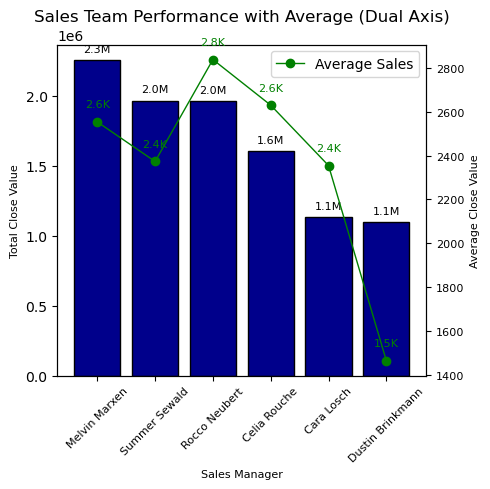

In [3]:
import matplotlib.pyplot as plt

# Group by 'manager' (or 'sales_agent') and calculate total close_value
performance_by_team = sales_df[sales_df['deal_stage'] == 'Won'].groupby('manager')['close_value'].sum().sort_values(ascending=False)

# Calculate the average for each sales team and reorder to match the total performance order
average_sales_per_team = sales_df[sales_df['deal_stage'] == 'Won'].groupby('manager')['close_value'].mean()
average_sales_per_team = average_sales_per_team[performance_by_team.index]

# Create a figure and a set of subplots with dual y-axes
fig, ax1 = plt.subplots(figsize=(5, 5))

# Create the bar chart for total sales
ax1.bar(performance_by_team.index, performance_by_team.values, color='darkblue', edgecolor='black')

# Add values on top of the bars
for idx, value in enumerate(performance_by_team):
    ax1.text(idx, value + 0.02 * performance_by_team.max(), f'{value / 1e6:.1f}M', ha='center', va='bottom', fontsize=8)

# Set labels and title for the first axis (total sales)
ax1.set_title('Sales Team Performance with Average (Dual Axis)', fontsize=12)
ax1.set_xlabel('Sales Manager', fontsize=8)
ax1.set_ylabel('Total Close Value', fontsize=8)
ax1.tick_params(axis='x', rotation=45, labelsize=8)

# Create the second y-axis to plot the average sales
ax2 = ax1.twinx()
ax2.plot(average_sales_per_team.index, average_sales_per_team.values, color='green', marker='o', label='Average Sales', linewidth=1)

# Add the average sales values on top of the trend line
for idx, value in enumerate(average_sales_per_team):
    ax2.text(idx, value + 0.02 * average_sales_per_team.max(), f'{value / 1000:,.1f}K', ha='center', va='bottom', fontsize=8, color='green')

# Set labels for the second axis (average sales)
ax2.set_ylabel('Average Close Value', fontsize=8)
ax2.tick_params(axis='y', labelsize=8)

# Show the legend
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

#### Dustin Brinkmann's team is underperforming; his closed value is one of the lowest, and the average of their closed deals is 60% below the second lowest.